In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy import io
import os
from scipy import signal

In [77]:
import scipy.integrate as si
import umap
import umap.umap_ as umap

In [2]:
P2_pre_training = io.loadmat('P2_pre_training_filtered.mat')

In [26]:
data=P2_pre_training['dataOut']
np.shape(data[0][0]), np.shape(data[1][0])  #-1, 1

((78, 16, 2048), (79, 16, 2048))

In [40]:
X = np.reshape(data[0][0], (78,16*2048))
Y = np.reshape(data[1][0], (79,16*2048))

In [55]:
X.shape

(78, 32768)

In [60]:
np.shape(X[0,:])

(32768,)

In [67]:
X[3,:]

array([ 0.        ,  6.92576291,  0.        , ...,  6.18560068,
       -6.52343156,  4.09228074])

In [62]:
X.shape

(78, 32768)

In [70]:
V=[]
L=[]
for i in range(78):
    V.append(X[i,:])
    L.append(-1)

In [71]:
for i in range(79):
    V.append(Y[i,:])
    L.append(1)

In [76]:
V = np.array(V)
L = np.array(L)

In [85]:
import random

In [86]:
c = list(zip(V,L))

random.shuffle(c)

V,L = zip(*c) 

In [90]:
embedding = umap.UMAP(n_components=100).fit_transform(V, y=L)  #n_components=100

In [88]:
np.shape(embedding)

(157, 2)

Text(0.5, 1.0, 'UMAP projection of the Features Vectors')

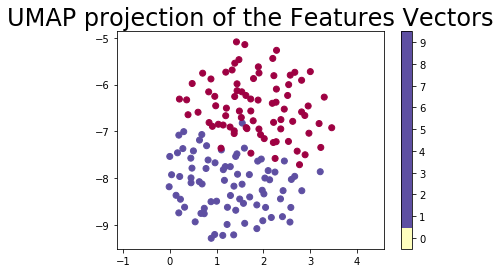

In [89]:
plt.scatter(embedding[:, 0], embedding[:, 1], c=L, cmap='Spectral')  
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP projection of the Features Vectors', fontsize=24)

In [91]:
from sklearn import model_selection
from sklearn import preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.linear_model import LogisticRegression
from sklearn import decomposition, ensemble
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [93]:
SEED = 0
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(embedding, L, test_size = 0.2, random_state = SEED)

In [94]:
MLP=MLPClassifier().fit(train_x, train_y) 
MLP.score(valid_x, valid_y)

C:\Users\arian\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.96875